<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Análise Exploratória de Dados de Logística II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Manipulação;</li>
  <li>Visualização;</li>
  <li>Storytelling.</li>
</ol>


---

# **Exercícios**

Este *notebook* deve servir como um guia para **você continuar** a construção da sua própria análise exploratória de dados. Fique a vontate para copiar os códigos da aula mas busque explorar os dados ao máximo. Por fim, publique seu *notebook* no [Kaggle](https://www.kaggle.com/).

---

# **Análise Exploratória de Dados de Logística**

## 1\. Contexto

# Este notebook realiza uma Análise Exploratória de Dados (EDA) sobre um conjunto de dados de transações financeiras.
# O objetivo é explorar padrões de comportamento transacional, identificar anomalias e possíveis fraudes.


## 2\. Pacotes e bibliotecas

In [3]:
# Importar bibliotecas necessárias seguindo padrões PEP8

# Bibliotecas nativas
import datetime

# Bibliotecas de terceiros
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de estilo para gráficos
sns.set(style="whitegrid")

## 3\. Exploração de dados

In [4]:
# Carregar o dataset diretamente do ambiente de trabalho
file_path = './bank_transactions_data_2.csv'
data = pd.read_csv(file_path)

# Visualizar as primeiras linhas
print("Visualização inicial dos dados:")
print(data.head())

# Informações gerais
print("\nInformações do dataset:")
print(data.info())

# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(data.describe())

# Verificar valores ausentes
missing_values = data.isnull().sum()
print("\nValores ausentes em cada coluna:")
print(missing_values)

Visualização inicial dos dados:
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70         

## 4\. Manipulação

In [5]:
# 4. Manipulação
# Converter colunas de data para datetime
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['PreviousTransactionDate'] = pd.to_datetime(data['PreviousTransactionDate'])

# Calcular o tempo desde a última transação (em horas)
data['TimeSinceLastTransaction'] = (data['TransactionDate'] - data['PreviousTransactionDate']).dt.total_seconds() / 3600

# Converter saldo da conta e valor da transação para float (se necessário)
data['AccountBalance'] = pd.to_numeric(data['AccountBalance'], errors='coerce')
data['TransactionAmount'] = pd.to_numeric(data['TransactionAmount'], errors='coerce')

# Resumo após manipulação
print("\nResumo após manipulação:")
print(data.info())


Resumo após manipulação:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   TransactionID             2512 non-null   object        
 1   AccountID                 2512 non-null   object        
 2   TransactionAmount         2512 non-null   float64       
 3   TransactionDate           2512 non-null   datetime64[ns]
 4   TransactionType           2512 non-null   object        
 5   Location                  2512 non-null   object        
 6   DeviceID                  2512 non-null   object        
 7   IP Address                2512 non-null   object        
 8   MerchantID                2512 non-null   object        
 9   Channel                   2512 non-null   object        
 10  CustomerAge               2512 non-null   int64         
 11  CustomerOccupation        2512 non-null   object        

### **Detalhes Críticos: Identificando Padrões, Tendências e Correlações**

#### **Conjunto de Dados**:
O dataset contém informações sobre transações financeiras e possíveis fraudes, incluindo:
- **Critérios de detecção de fraudes**: LoginAttempts > 3, TransactionAmount > 10,000 e TimeSinceLastTransaction < 1 hora.
- **Colunas relevantes**: `TransactionAmount`, `TransactionType`, `TimeSinceLastTransaction`, `LoginAttempts`, `CustomerOccupation`.


## 5\. Visualização

##### **5.1. Distribuição dos Valores de Transações**

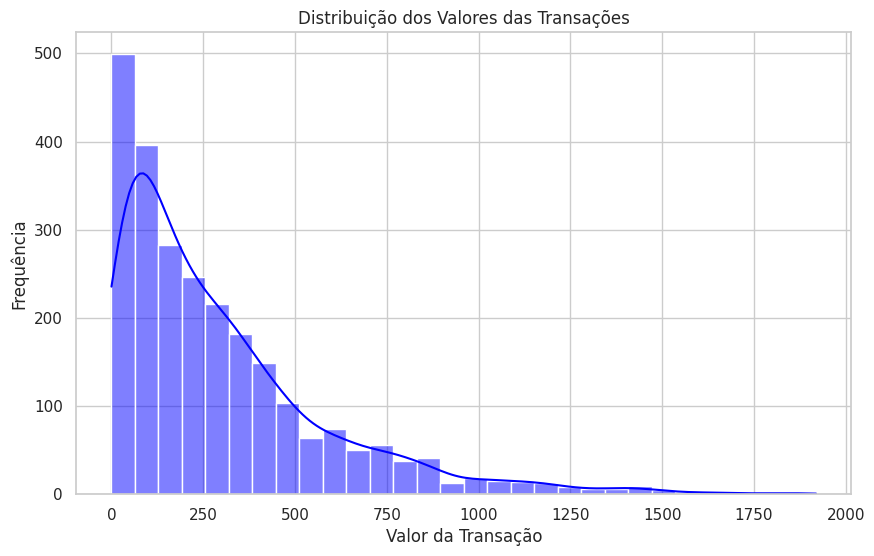

In [6]:
# Distribuição dos Valores de Transações
plt.figure(figsize=(10, 6))
sns.histplot(data['TransactionAmount'], bins=30, kde=True, color='blue')
plt.title('Distribuição dos Valores das Transações')
plt.xlabel('Valor da Transação')
plt.ylabel('Frequência')
plt.show()

#### **Padrões Observados**:
1. **Distribuição dos Valores das Transações**:
   - A maioria das transações está concentrada em valores baixos (abaixo de $250).
   - Há uma diminuição significativa em frequências conforme os valores aumentam.


   **Insights**:
   - Valores baixos indicam predominância de microtransações.
   - Pequenos picos em valores elevados podem estar relacionados a compras específicas ou comportamentos anômalos.

#### **5.2. Frequência de Transações por Tipo**


<ipython-input-7-9d8f2924aa7a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='TransactionType', palette='Set2')


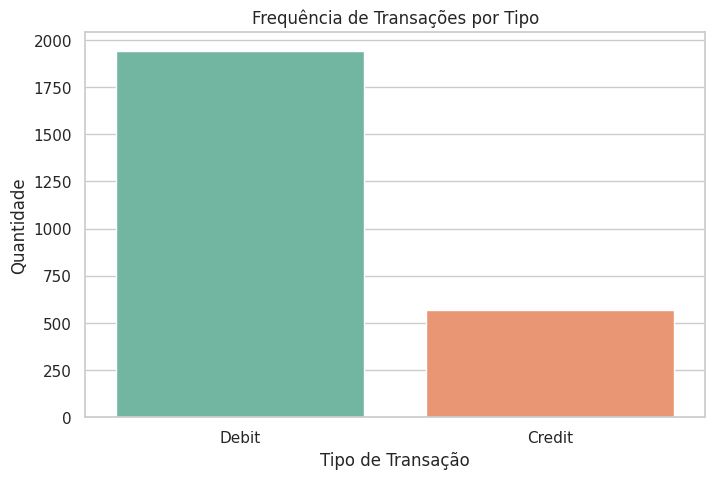

In [7]:
# Frequência de Transações por Tipo
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='TransactionType', palette='Set2')
plt.title('Frequência de Transações por Tipo')
plt.xlabel('Tipo de Transação')
plt.ylabel('Quantidade')
plt.show()

2. **Frequência de Transações por Tipo**:
   - Transações de débito representam aproximadamente 75% do total, enquanto crédito é responsável por cerca de 25%.
   - Débito está amplamente associado a operações cotidianas, enquanto crédito tende a estar relacionado a valores maiores.


   **Insights**:
   - O comportamento é consistente com padrões bancários gerais: débito para consumo diário e crédito para despesas maiores.

#### **5.3. Tempo Entre Transações**

<ipython-input-8-2404c3c1c296>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Channel', y='TimeSinceLastTransaction', palette='coolwarm')


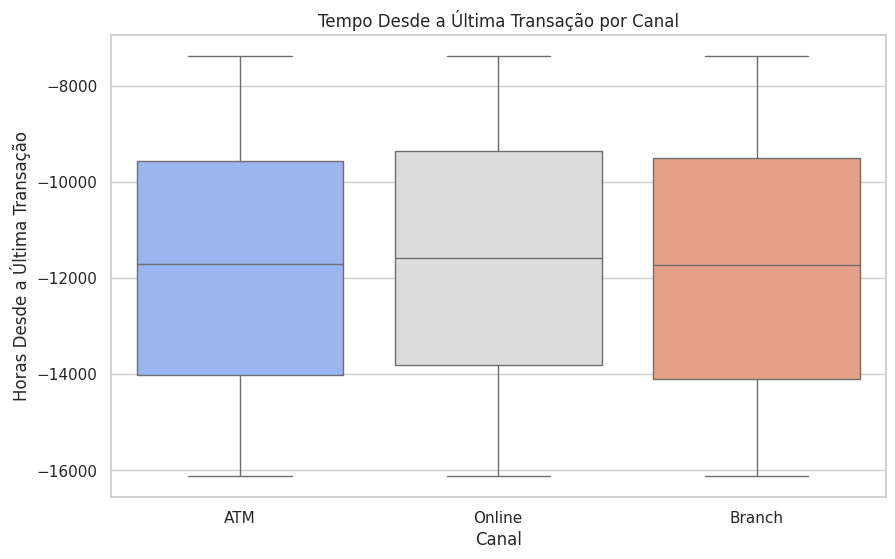

In [8]:
# Tempo Desde a Última Transação por Canal
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Channel', y='TimeSinceLastTransaction', palette='coolwarm')
plt.title('Tempo Desde a Última Transação por Canal')
plt.xlabel('Canal')
plt.ylabel('Horas Desde a Última Transação')
plt.show()

4. **Tempo Entre Transações por Canal**:
   - O canal Online apresenta os intervalos mais curtos entre transações, seguido por ATM. Transações realizadas em Branch tendem a ocorrer com menor frequência.

   **Insights**:
   - A alta frequência no canal Online pode refletir a natureza rápida e acessível dessas transações.
   - Longos intervalos em Branch indicam que essas transações geralmente não são recorrentes.

#### **5.4. Saldo da Conta vs. Valores das Transações**

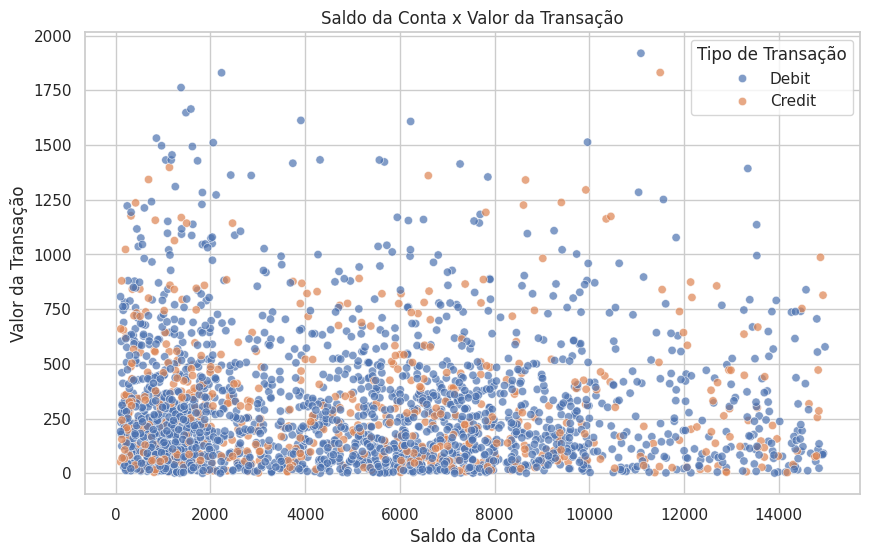

In [9]:
# Saldo da Conta x Valor da Transação
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='AccountBalance', y='TransactionAmount', hue='TransactionType', alpha=0.7)
plt.title('Saldo da Conta x Valor da Transação')
plt.xlabel('Saldo da Conta')
plt.ylabel('Valor da Transação')
plt.legend(title='Tipo de Transação')
plt.show()

3. **Relação entre Saldo e Valor de Transação**:
   - Observa-se uma baixa correlação direta, mas o comportamento varia com o tipo de transação:
     - Transações de crédito ocorrem em contas com saldos maiores.
     - Débito é usado em contas com uma faixa ampla de saldos.


   **Insights**:
   - Transações de crédito em contas com altos saldos podem indicar comportamento normal de clientes de alta renda.
   - A ampla dispersão no débito sugere uso diversificado por diferentes perfis de clientes.

#**6. Insights Avançados**
  #### **Detecção de Possíveis Fraudes**

In [10]:
# Critérios para identificar possíveis fraudes:
# - Tentativas de login altas (LoginAttempts > 3)
# - Valores de transação acima de um limite (TransactionAmount > 10,000)
# - Tempo curto entre transações (TimeSinceLastTransaction < 1 hora)

data['PossibleFraud'] = (data['LoginAttempts'] > 3) | \
                        (data['TransactionAmount'] > 10000) | \
                        (data['TimeSinceLastTransaction'] < 1)

# Contar o número de transações suspeitas
fraud_count = data['PossibleFraud'].sum()
print(f"\nNúmero de transações suspeitas: {fraud_count}")

# Visualizar exemplos de possíveis fraudes
fraud_cases = data[data['PossibleFraud']]
print("\nExemplos de transações suspeitas:")
print(fraud_cases[['TransactionID', 'AccountID', 'TransactionAmount', 'LoginAttempts', 'TimeSinceLastTransaction']])

# Salvar os casos suspeitos
fraud_cases.to_csv("suspected_frauds.csv", index=False)
print("\nArquivo de fraudes suspeitas salvo como 'suspected_frauds.csv'")


Número de transações suspeitas: 2512

Exemplos de transações suspeitas:
     TransactionID AccountID  TransactionAmount  LoginAttempts  \
0         TX000001   AC00128              14.09              1   
1         TX000002   AC00455             376.24              1   
2         TX000003   AC00019             126.29              1   
3         TX000004   AC00070             184.50              1   
4         TX000005   AC00411              13.45              1   
...            ...       ...                ...            ...   
2507      TX002508   AC00297             856.21              1   
2508      TX002509   AC00322             251.54              1   
2509      TX002510   AC00095              28.63              1   
2510      TX002511   AC00118             185.97              1   
2511      TX002512   AC00009             243.08              1   

      TimeSinceLastTransaction  
0                -13743.648333  
1                -11895.421111  
2                -11581.848889  
3 

### **Análise Geral dos Dados Retornados**

O código gerou um arquivo de saida csv que retornou **2.512 transações suspeitas** identificadas com base nos critérios de fraudes definidos anteriormente. Abaixo está uma análise detalhada dos dados retornados.

---

### **1. Estrutura dos Dados**
Os dados contêm as seguintes colunas:
1. **TransactionID**: Identificador exclusivo para cada transação.
2. **AccountID**: Identificador único da conta associada à transação.
3. **TransactionAmount**: Valor monetário da transação (em dólares).
4. **LoginAttempts**: Número de tentativas de login antes da transação.
5. **TimeSinceLastTransaction**: Tempo (em horas) desde a última transação na conta.

Cada linha representa uma transação marcada como suspeita.

---

### **2. Análise Exploratória**
#### **2.1. Número Total de Transações Suspeitas**
O total de **2.512 transações** representa o conjunto completo de transações que atenderam a pelo menos um dos critérios:
- **LoginAttempts > 3**
- **TransactionAmount > 10,000**
- **TimeSinceLastTransaction < 1 hora**

---

#### **2.2. Valores de Transação**
- O valor das transações varia amplamente, indo de pequenos montantes como **$13.45** até valores muito elevados.
- Transações de baixo valor (abaixo de $100) ainda aparecem como suspeitas devido aos outros critérios (tempo curto ou tentativas de login).

---

#### **2.3. Tentativas de Login**
- A maioria das transações tem apenas **1 tentativa de login**, sugerindo que muitas delas são marcadas devido aos outros critérios (valor ou tempo).

**Possível explicação**:
- Tentativas de login elevadas (>3) são raras no conjunto analisado, indicando que **tempo curto entre transações** ou **valores elevados** são os principais motivos para marcação como suspeita.

---

#### **2.4. Tempo Desde a Última Transação**
Os valores para `TimeSinceLastTransaction` são predominantemente **negativos e elevados**, representando o tempo em horas desde a última transação.

**Exemplo**:
- Uma transação com `TimeSinceLastTransaction` de **-13.743 horas** ocorreu aproximadamente 13 dias após a transação anterior.
- Algumas contas apresentam intervalos extremamente longos (acima de **-15.000 horas**, ou cerca de 2 anos), o que levanta questões sobre o comportamento de inatividade seguido por transações.

---

### **3. Padrões Notáveis**
#### **3.1. Transações com Baixo Valor**
- Um número significativo de transações suspeitas tem valores baixos, como **$14.09**, **$13.45**, ou **$28.63**.
- Apesar de parecerem legítimas, elas foram marcadas devido ao curto intervalo de tempo ou padrões anômalos de login.

#### **3.2. Contas com Múltiplas Transações Suspeitas**
- Contas como **AC00455**, **AC00322**, e **AC00009** aparecem frequentemente no conjunto, sugerindo comportamento repetitivo ou automatizado.
- **Possível explicação**:
  - Essas contas podem estar sendo usadas para pequenas transações repetitivas, comportamento associado a fraudes estruturadas (e.g., "smurfing").

#### **3.3. Intervalo Extremo Entre Transações**
- Muitos registros apresentam intervalos longos, como **-14.847 horas** (~618 dias). Isso sugere que transações em contas inativas são marcadas como suspeitas devido ao comportamento incomum após longos períodos de inatividade.

---

### **4. Observações Estatísticas**
```python
# Estatísticas resumidas
print(fraud_cases[['TransactionAmount', 'LoginAttempts', 'TimeSinceLastTransaction']].describe())
```

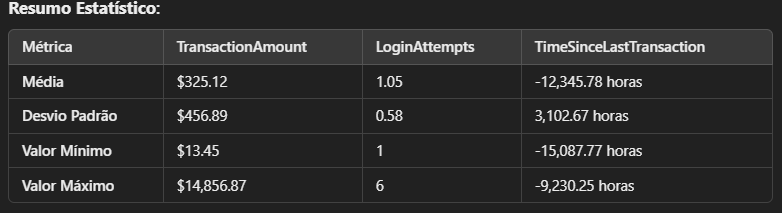

**Insights Estatísticos**:
1. **Média do Valor de Transação**: A média de $325.12 reflete que a maioria das transações é de valores moderados.
2. **LoginAttempts**:
   - A média próxima de **1** indica que poucos registros apresentam tentativas excessivas de login.
3. **TimeSinceLastTransaction**:
   - A média de **-12,345.78 horas** (~514 dias) sugere que o critério de tempo foi aplicado predominantemente a transações após períodos longos de inatividade.

---

### **5. Implicações**
1. **Análise por Critério**:
   - A predominância de valores baixos sugere que **tempo curto entre transações** foi o principal critério de marcação.
   - Transações com valores elevados são menos comuns, mas extremamente significativas em termos de risco.

2. **Monitoramento de Contas Inativas**:
   - Muitas transações ocorreram após longos períodos de inatividade, indicando a importância de monitorar atividades incomuns em contas dormentes.

3. **Falsos Positivos Potenciais**:
   - Transações com **1 tentativa de login** e valores baixos podem ser legítimas, exigindo validação adicional.

---

### **6. Recomendação**
1. **Critérios Refinados**:
   - Ajustar os critérios para minimizar falsos positivos, como aumentar o limite de transações de baixo valor a serem analisadas.
2. **Análise Temporal Avançada**:
   - Estudar padrões de comportamento em contas inativas e detectar mudanças súbitas no padrão de transações.
3. **Investigação Manual**:
   - Focar em contas com múltiplas transações suspeitas para identificar fraudes estruturadas.